# Plans:

## Setting up the dataset
- For each image in the data
- Attach to it the labels
- Run it through the CV model to create the labels. Record each one's X, Y, Z
- Subtract landmarks to form adjusted X, Y, Z
- Scale down based off landmarks 5-6 distance to create adjusted hand size landmarks

In [50]:
import math
import os
import numpy as np
import pandas as pd
from sklearn import model_selection
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import tensorflow as tf
import tensorflow.python.keras.layers

In [26]:
def normalize(hand_landmarks):
    landmark_list = []
    for landmark in hand_landmarks:
        landmark_list.append([landmark.x, landmark.y, landmark.z])
    # normalize distance for distance between 5 and 6
    x_sq = math.pow(landmark_list[5][0] - landmark_list[6][0], 2)
    y_sq = math.pow(landmark_list[5][1] - landmark_list[6][1], 2)
    z_sq = math.pow(landmark_list[5][2] - landmark_list[6][2], 2)
    normalized_distance = math.sqrt(x_sq+y_sq+z_sq)
    # return landmarks to plain list
    plain_list = []
    # the most significant one is number 5. Normalize all values in relation to it
    for index in range(0, len(landmark_list)):
        for detail in range(0, 3):
            plain_list.append((landmark_list[index][detail] - landmark_list[5][detail]) / normalized_distance)
    # return results
    return plain_list

In [11]:
#path to data storage
dataset_path = "E:\\GoogleCVTraining\\hagrid-classification-512p"

# detect labels
print(dataset_path)
labels = []
for i in os.listdir(dataset_path):
  if os.path.isdir(os.path.join(dataset_path, i)):
    labels.append(i)
print(labels)

E:\GoogleCVTraining\hagrid-classification-512p
['dislike', 'fist', 'four', 'like', 'one', 'palm', 'peace', 'peace_inverted', 'rock', 'stop', 'three', 'three2', 'two_up', 'none', 'two_up_inverted']


In [21]:
# set up the pandas DF
columns = ["filename", "label"]
for index in range(0, 21):
    columns.append("x_" + str(index))
    columns.append("y_" + str(index))
    columns.append("z_" + str(index))
print(columns)

['filename', 'label', 'x_0', 'y_0', 'z_0', 'x_1', 'y_1', 'z_1', 'x_2', 'y_2', 'z_2', 'x_3', 'y_3', 'z_3', 'x_4', 'y_4', 'z_4', 'x_5', 'y_5', 'z_5', 'x_6', 'y_6', 'z_6', 'x_7', 'y_7', 'z_7', 'x_8', 'y_8', 'z_8', 'x_9', 'y_9', 'z_9', 'x_10', 'y_10', 'z_10', 'x_11', 'y_11', 'z_11', 'x_12', 'y_12', 'z_12', 'x_13', 'y_13', 'z_13', 'x_14', 'y_14', 'z_14', 'x_15', 'y_15', 'z_15', 'x_16', 'y_16', 'z_16', 'x_17', 'y_17', 'z_17', 'x_18', 'y_18', 'z_18', 'x_19', 'y_19', 'z_19', 'x_20', 'y_20', 'z_20']


In [39]:
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

# Bot path for the sample dataset
model_path = 'E:\\Training-Gesture-Rec\\Google-Gesture-Recognition\\gesture_recognizer.task'

# Create an GestureRecognizer object and its detals
base_options = python.BaseOptions(model_asset_path=model_path)
VisionRunningMode = mp.tasks.vision.RunningMode
GestureRecognizerResult = mp.tasks.vision.GestureRecognizerResult
GestureRecognizer = mp.tasks.vision.GestureRecognizer
options = vision.GestureRecognizerOptions(
    base_options=base_options)

# create DF
df = pd.DataFrame([], columns=columns)

print("beginning recognition")

parsed_images_num = 0
failed_images_num = 0

with GestureRecognizer.create_from_options(options) as recognizer:
    # for each image in the dataset
    for subfolder in ['dislike', 'fist', 'four', 'like', 'one', 'palm', 'peace', 'peace_inverted', 'rock', 'stop', 'three', 'three2', 'two_up', 'none', 'two_up_inverted']:
        print("parsing subfolder " + subfolder)
        # for each file in folder
        curr_path = os.path.join(dataset_path, subfolder)
        for file in os.listdir(curr_path):
            file_path = os.path.join(curr_path, file)
            # print("parsing " + str(file_path))
            mp_image = mp.Image.create_from_file(file_path)
            list_landmarks = []
            # Perform gesture recognition on the provided single image.
            # The gesture recognizer must be created with the image mode.
            gesture_recognition_result = recognizer.recognize(mp_image)
            try:
                normalized_landmarks = normalize(gesture_recognition_result.hand_landmarks[0])
                df.loc[len(df)] = [str(file), subfolder] + normalized_landmarks
            except:
                print("Failed Image " + str(parsed_images_num + 1) + " as failed image #" + str(failed_images_num) + " In folder " + subfolder)
                print(file_path)
                failed_images_num+=1
                continue
            parsed_images_num+=1
            if parsed_images_num % 100 == 0:
                print("Parsed " + str(parsed_images_num) + " images")
                print("Current Series: " + subfolder)

print("Total Parsed Images " + str(parsed_images_num))
print("Of those, there were " + str(failed_images_num) + " failed images")

beginning recognition
parsing subfolder dislike
Failed Image 6 as failed image #0 In folder dislike
E:\GoogleCVTraining\hagrid-classification-512p\dislike\00061804-896a-4dcc-b019-2e751e2512a1.jpg
Failed Image 18 as failed image #1 In folder dislike
E:\GoogleCVTraining\hagrid-classification-512p\dislike\001e4715-7341-4639-94fe-a9c4b310e3a9.jpg
Failed Image 30 as failed image #2 In folder dislike
E:\GoogleCVTraining\hagrid-classification-512p\dislike\003c595e-c2c4-4cb8-8be3-0e6958fcdace.jpg
Failed Image 33 as failed image #3 In folder dislike
E:\GoogleCVTraining\hagrid-classification-512p\dislike\00481821-8795-4011-bc0a-67f99fa53cac.jpg
Failed Image 41 as failed image #4 In folder dislike
E:\GoogleCVTraining\hagrid-classification-512p\dislike\005bfe90-a8fc-4cf1-83b4-b7e611c96c7a.jpg
Failed Image 46 as failed image #5 In folder dislike
E:\GoogleCVTraining\hagrid-classification-512p\dislike\0069bc12-d640-4128-b869-eb5c95ed7aa7.jpg
Failed Image 51 as failed image #6 In folder dislike
E:\Goo

In [ ]:
# store dataframe
df.to_csv('E:\Training-Gesture-Rec\parsed_images_backup.csv', index=False)

# add onehot encoding
# Get one hot encoding of column label
one_hot = pd.get_dummies(df['label'])
# Join the encoded df
df = df.join(one_hot)

# store dataframe
df.to_csv('E:\Training-Gesture-Rec\parsed_images.csv', index=False)

In [61]:
# Load dataframe from csv storage
df = pd.read_csv('E:\\Training-Gesture-Rec\\parsed_images_backup.csv')

# Print the DataFrame
print(df)

encoder = LabelEncoder()
encoder.fit(df['label'])
encoded_labels = encoder.transform(df['label'])
print(encoded_labels)

df = df.drop('label', axis=1)
df = df.drop('filename', axis=1)

# Split df data
X_train, X_test, y_train, y_test = model_selection.train_test_split(df, encoded_labels, test_size=0.2, random_state=1)

                                        filename            label       x_0  \
0       0000f1d1-1b41-4489-bdb4-1e43ec991c81.jpg          dislike  1.905220   
1       00014592-4c3b-484b-a7ef-9266a8a983b3.jpg          dislike -3.589481   
2       0002d399-1a5d-4595-bfd6-25c5ef9d1d5c.jpg          dislike -4.612079   
3       00038b7a-efb9-4df1-bf95-b31633f55791.jpg          dislike  2.686901   
4       0003b0ed-4036-455e-bfab-4ae3ad1576aa.jpg          dislike -2.778763   
...                                          ...              ...       ...   
367471  ffee1376-1d58-41fd-82b2-e6ee7ee76e3e.jpg  two_up_inverted  0.376869   
367472  ffeee257-0f50-46e7-8389-cf32c70232ad.jpg  two_up_inverted  0.380220   
367473  ffefab84-7551-4a6f-8cd6-de982d372a1e.jpg  two_up_inverted -0.293543   
367474  fff4d2f6-9890-4225-8d9c-73a02ba8f9ac.jpg  two_up_inverted -0.585110   
367475  fffba6e3-9d99-4f90-9788-5fafd95765b0.jpg  two_up_inverted  0.588303   

             y_0       z_0       x_1       y_1     

In [13]:
df = df.drop('filename', axis=1)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367476 entries, 0 to 367475
Data columns (total 63 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   x_0     367476 non-null  float64
 1   y_0     367476 non-null  float64
 2   z_0     367476 non-null  float64
 3   x_1     367476 non-null  float64
 4   y_1     367476 non-null  float64
 5   z_1     367476 non-null  float64
 6   x_2     367476 non-null  float64
 7   y_2     367476 non-null  float64
 8   z_2     367476 non-null  float64
 9   x_3     367476 non-null  float64
 10  y_3     367476 non-null  float64
 11  z_3     367476 non-null  float64
 12  x_4     367476 non-null  float64
 13  y_4     367476 non-null  float64
 14  z_4     367476 non-null  float64
 15  x_5     367476 non-null  float64
 16  y_5     367476 non-null  float64
 17  z_5     367476 non-null  float64
 18  x_6     367476 non-null  float64
 19  y_6     367476 non-null  float64
 20  z_6     367476 non-null  float64
 21  x_7     36

<Axes: xlabel='label'>

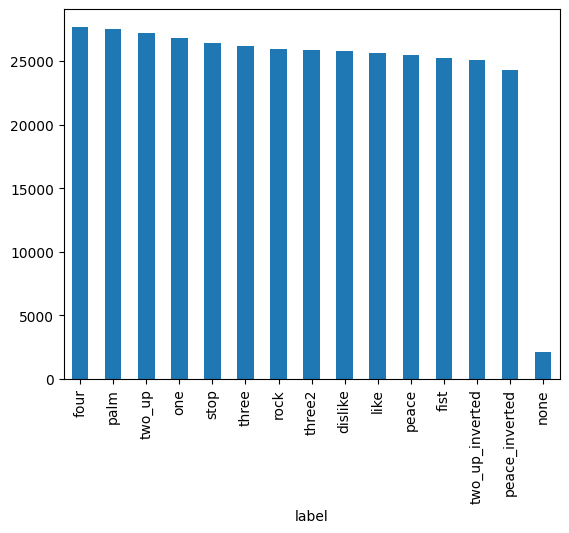

In [41]:
# Plot occurences of different groups
df.label.value_counts().plot(kind='bar')

In [62]:
# Convert labels into one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=15)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=15)

print(X_train.shape)
print(y_train.shape)

(293980, 63)
(293980, 15)


In [66]:
# create the model
model = tf.keras.Sequential()
# Input shape: (1, 63) - meaning 1 sample with 63 features
model.add(tf.keras.layers.Reshape((63, 1), input_shape=(63,)))  # Reshape to (63, 1) for 1D convolution
model.add(tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu'))
# MaxPooling layer
model.add(tf.keras.layers.MaxPooling1D(pool_size=2))
model.add(tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu'))
# MaxPooling layer
model.add(tf.keras.layers.MaxPooling1D(pool_size=2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(15, activation='softmax'))

# compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print(model.summary())

E:\Training-Gesture-Rec\.venv\Lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape_2 (Reshape)             │ (None, 63, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_13 (Conv1D)              │ (None, 61, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 30, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_14 (Conv1D)              │ (None, 28, 64)         │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ (None, 14, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 896)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_108 (Dense)               │ (None, 128)            │       114,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_109 (Dense)               │ (None, 15)             │         1,935 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 123,087 (480.81 KB)

 Trainable params: 123,087 (480.81 KB)

 Non-trainable params: 0 (0.00 B)

None


In [68]:
# Train the model
trained_model = model.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=10,
    verbose=1,
    validation_split=0.2
)

print(trained_model.history)

Epoch 1/10
7350/7350 ━━━━━━━━━━━━━━━━━━━━ 47s 6ms/step - accuracy: 0.9850 - loss: 0.0571 - val_accuracy: 0.9849 - val_loss: 0.0548
Epoch 2/10
7350/7350 ━━━━━━━━━━━━━━━━━━━━ 42s 6ms/step - accuracy: 0.9875 - loss: 0.0448 - val_accuracy: 0.9860 - val_loss: 0.0544
Epoch 3/10
7350/7350 ━━━━━━━━━━━━━━━━━━━━ 41s 6ms/step - accuracy: 0.9882 - loss: 0.0419 - val_accuracy: 0.9868 - val_loss: 0.0502
Epoch 4/10
7350/7350 ━━━━━━━━━━━━━━━━━━━━ 42s 6ms/step - accuracy: 0.9892 - loss: 0.0382 - val_accuracy: 0.9872 - val_loss: 0.0487
Epoch 5/10
7350/7350 ━━━━━━━━━━━━━━━━━━━━ 41s 6ms/step - accuracy: 0.9897 - loss: 0.0356 - val_accuracy: 0.9864 - val_loss: 0.0503
Epoch 6/10
7350/7350 ━━━━━━━━━━━━━━━━━━━━ 41s 6ms/step - accuracy: 0.9900 - loss: 0.0347 - val_accuracy: 0.9876 - val_loss: 0.0496
Epoch 7/10
7350/7350 ━━━━━━━━━━━━━━━━━━━━ 42s 6ms/step - accuracy: 0.9907 - loss: 0.0319 - val_accuracy: 0.9877 - val_loss: 0.0518
Epoch 8/10
7350/7350 ━━━━━━━━━━━━━━━━━━━━ 42s 6ms/step - accuracy: 0.9910 - loss: 0

In [71]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(X_test, y_test)
print("test loss, test acc:", results)

Evaluate on test data
2297/2297 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9880 - loss: 0.0486
test loss, test acc: [0.048471104353666306, 0.9881489872932434]


In [72]:
model.save('GoogleCVTrained.keras')

In [74]:
test = tf.keras.models.load_model('E:\\Training-Gesture-Rec\\GoogleCVTrained.keras')

# Show the model architecture
test.summary()

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape_2 (Reshape)             │ (None, 63, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_13 (Conv1D)              │ (None, 61, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 30, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_14 (Conv1D)              │ (None, 28, 64)         │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ (None, 14, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 896)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_108 (Dense)               │ (None, 128)            │       114,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_109 (Dense)               │ (None, 15)             │         1,935 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 369,263 (1.41 MB)

 Trainable params: 123,087 (480.81 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 246,176 (961.63 KB)